### Homeworksheet 4 

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from math import factorial

In these excercises the Numerov algorithm is used to calculate the stationary states of neutrons in the gravitational field of the Earth.

The gravitational potential can be expressed as 
(blabla hier fancy latex einfügen)

we place a perfectly reflecting mirror at z=0, so  we only seek solutions for z>=0.

We now need to properly choose length and energy units to blablabla
so the equation can be written in the form 
blablabla formel vom Zettel

An equation of this shape can be solved using the nuverov algorithm, as discussed in the lecture.

In the following cell, the Numerov algorithm is implemented. the function kb is defined so one can easily adapt the numerov algorithm to different potentials.

In [74]:
#Calculates each step using numerov method
def numerov_step(psi_minus_1, psi, k_minus_1, k, k_plus_1, h):
    h2 = h ** 2
    a = 2 * (1 - (5 / 12) * (h2) * k) * psi
    b = (1 + (1 / 12) * (h2) * k_minus_1) * psi_minus_1
    c = (1 + (1 / 12) * (h2) * k_plus_1)
    return (a - b) / c

def kb(epsilon, x):
    return epsilon-x

def numerov(a, h, xmax, epsilon):
    #initiate starting values
    x0 = 0
    x_out = [x0]
    psi0 = 0
    psi1 = a 
    psi_out = [psi0, psi1]
    x0 += h
    x_out.append(x0)
    #iterate over intervall
    while x0 <= xmax:
        x0 += h
        #calculate using numerov method
        psin = numerov_step(psi_out[-2], psi_out[-1], kb(epsilon, (x_out[-2])), kb(epsilon, (x_out[-1])), kb(epsilon, (x0)), h)
        #Needed for plotting
        psi_out.append(psin)
        x_out.append(x0)
    #convert into arrays
    x_out = np.array(x_out)
    psi_out = np.array(psi_out)
    return x_out, psi_out



#### Part 1: The behaviour of the obtained solution for large x

In the first part, the differential equation is solved and plotted for two different (blablabla epsilon), to show the different behaviour of the solution for x approaching infinity. 

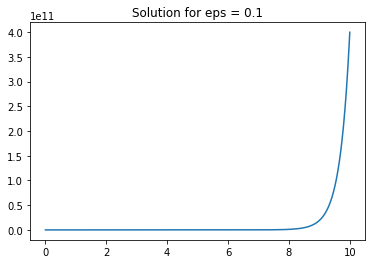

In [75]:
#plot for eps = 0.1
eps=0.1
x_out, psi = numerov(1, 0.001, 10,eps)
plt.title("Solution for eps = %.1f" %(eps))
plt.plot(x_out, psi)

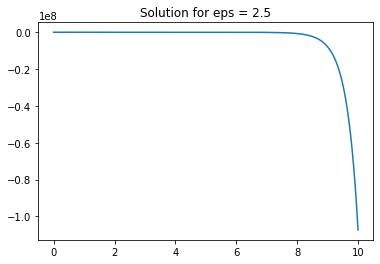

In [76]:
#plot for eps = 2.5
eps=2.5
x_out, psi = numerov(1, 0.001, 10, eps)

plt.title("Solution for eps = %.1f" %(eps))
plt.plot(x_out, psi)


As one can see, eps = 0.1 leads to positive asymptopic behaviour, while eps =2.5 leads to necatv asymptopic behaviour
( blablabla vielleicht noch mehr, ode rgründe oder so)

### Part 2: Calculating the Eigenvalues of the equation

In this part of the excercise, the Eigenvalues of the first three bound states were calculated to two decimals behind the comma, using the properties of the eigenfunction.

In [72]:
def find_eigenvalues(steps, stepsize):
    #Stores possible solutions
    poss_sol = []
    #Stores last value of each calculation
    list_last = []
    #calculate for different epsilons
    for i in range(steps):
        x, y = numerov(1, 0.001, 10, i*stepsize)
        list_last.append(y[-1])
    #turn into np.array
    list_last = np.array(list_last)
    #Iterate over every list item
    for n, y in enumerate(list_last):
        #Dont check 1st item, error would be thrown
        if n == 0:
            pass
        #if the last value of the array switches its value from plus to minus,
        # we know one of the values for epsilon must be an eigenvalue 
        elif list_last[n-1] > 0 and list_last[n] < 0:
            #checks which value is closer to zero and appends the one to the solutions list
            if abs(list_last[n-1]) < abs(list_last[n]):
                poss_sol.append((n-1)*stepsize)
            else:
                poss_sol.append(n*stepsize)
        #vice versa for switch form minus to plus
        elif list_last[n-1] < 0 and list_last[n] > 0:
            #same as above
            if abs(list_last[n-1]) < abs(list_last[n]):
                poss_sol.append((n-1)*stepsize)
            else:
                poss_sol.append(n*stepsize)
        #break after 3 solutions are found
        if len(poss_sol) == 3:
            break
        
    return poss_sol


The function to calculate possible eigenvalues in agiven range is now used to find the first three values beween 1000 and 1 

In [73]:
poss_sol = find_eigenvalues(1000, 0.01)
for n, solution in enumerate(poss_sol):
    print(f"Eigenvalue {n+1} = {solution:.2f}")

Eigenvalue 1 = 2.34
Eigenvalue 2 = 4.09
Eigenvalue 3 = 5.52
